# Исследование пользовательского спроса для Яндекс Афиша в Python и проверка гипотез

Автор: Котова Ольга  
Дата: 23.05.2025

## Цели и задачи проекта

**Цель:** 
Выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами, а также формирование рекомендаций на основе проведенного анализа.
 
**Задачи проекта:**
1.  Провести исследовательский анализ данных: 
- выявление возможных причин изменений в пользовательском спросе (фактор сезонности, изменение аудитории по возрастному рейтингу),  
- определение событий, которые стали привлекать больше зрителей, какие организаторы и площадки выбились в лидеры,   

2. Провести статичстический анализ данных  для выявления отличий в активности пользователей мобильных устройств от клиентов, которые бронируют билеты со стационарного компьютера - проведние A/B-теста и интерпретация его результатов:
- выбор статистического теста.
- получение результата теста, или p-value.  
- вывод на основе полученного p-value.


## Описание данных

Датасет `final_tickets_orders_df.csv` включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных:  
order_id — уникальный идентификатор заказа.  
user_id — уникальный идентификатор пользователя.  
created_dt_msk — дата создания заказа (московское время).  
created_ts_msk — дата и время создания заказа (московское время).  
event_id — идентификатор мероприятия из таблицы events.  
cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'  
age_limit — возрастное ограничение мероприятия.  
currency_code — валюта оплаты, например rub для российских рублей.  
device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.  
revenue — выручка от заказа.  
service_name — название билетного оператора.  
tickets_count — количество купленных билетов.  
total — общая сумма заказа.  
days_since_prev  -  количество дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.  
  
Датасет `final_tickets_events_df` содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия:  
event_id — уникальный идентификатор мероприятия.  
event_name — название мероприятия.   
event_type_description — описание типа мероприятия.  
event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.  
organizers — организаторы мероприятия.  
region_name — название региона.  
city_name — название города.  
venue_id — уникальный идентификатор площадки.  
venue_name — название площадки.  
venue_address — адрес площадки.  
  
Датасет `final_tickets_tenge_df.csv` с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:  
nominal — номинал (100 тенге).  
data — дата.  
curs — курс тенге к рублю.  
cdx — обозначение валюты (kzt).  


## Содержание проекта

1. Загрузка данных и знакомство с ними.  
2. Предобработка данных и подготовка их к исследованию.  
3. Исследовательский анализ данных: 
  
3.1. Анализ распределения заказов по сегментам и их сезонные изменения.  
- Анализ динамики в связи с сезонностью по таким разрезам, как тип мероприятия event_type_main; тип устройства device_type_canonical;  категория мероприятий по возрастному рейтингу age_limit.    
- Анализ количества заказов каждого месяца.  
- Для осеннего и летнего периодов сравнение распределения заказов билетов по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу (при сопоставлении результатов для каждого сегмента будем использовать доли).
- Изучение изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью.   
  
3.2.  Изучение осенней активности пользователей:    
- Анализ динакмики изменений по дням для: 
o	общего числа заказов;
o	количества активных пользователей DAU;
o	среднего числа заказов на одного пользователя;
o	средней стоимости одного билета.
Рекомендация: удобно создать одну сводную таблицу, и в ней по дням рассчитать число заказов и число уникальных пользователей, а затем найти величину — количество заказов на одного пользователя. Полученные результаты можно визуализировать с помощью линейного графика. Подобные графики вы строили на дашборде, только делали это с агрегацией по неделям.
- Изучение недельной цикличности, сравните пользовательской активности в будни и выходные.
  
 
3.3. Выявление популярных событий и партнёров (распределение по регионам и партнёрам).  
  
4. Статистический анализ данных.
  
Проверка гипотез относительно активности пользователей мобильных и стационарных устройств:   
•	Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.  
•	Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
  
5. Формулировка выводов и рекомендаций по проведённому анализу.


## Загрузка данных и знакомство с ними

Загружаем необходимые библиотеки и данные с 3 датасетов с информацией о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года: 

`final_tickets_orders_df.csv`, `final_tickets_events_df.csv`, `final_tickets_tenge_df.csv`

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats


In [2]:
# загрузка и знакомство с данными 
orders = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


При знакомстве с данными видим, что пропусков нет, везде по 290849 значений, за исключением последнего столбца`days_since_prev` с количеством дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск, так и должно быть. Типы данных в столбцах `created_dt_msk`, `created_ts_msk` из object требуют изменения в типы даты и времени. Также возможно снижение размерности количественных данных. В дальнейшем проверим наличие дубликатов и изменим на подходящие типы данных.

In [3]:
# загрузка и знакомство с данными 
events = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
events.info()
events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


В `final_tickets_events_df` также отсутствуют пропуски, тип данных соответствующий. В дальнейшем также проведем проверку на дубликаты.


In [4]:
# загрузка и знакомство с данными 
tenge = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')
tenge.info()
tenge.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


В третьем датасете также отсутствуют пропуски, на дубликаты проверим в следующем шаге. Типы данных всех столбцов, кроме даты - подходящие, по столбцу data необходимо изменение.

## Предобработка данных и подготовка их к исследованию

В данных пропусков не обнаружено, кроме столбца `days_since_prev`, где их присутствие нормально.
Изучим, какие категории присутствуют в данных. 


In [5]:
events.columns

Index(['event_id', 'event_name', 'event_type_description', 'event_type_main',
       'organizers', 'region_name', 'city_name', 'city_id', 'venue_id',
       'venue_name', 'venue_address'],
      dtype='object')

In [6]:
# выводим уникальные значения по столбцам  в заказах
for category_colomn in ['age_limit', 'currency_code', 'device_type_canonical',
       'service_name', 'tickets_count', 'days_since_prev']:
    display(f'Уникальные значения столбца {category_colomn}:')
    display(orders[category_colomn].unique())

'Уникальные значения столбца age_limit:'

array([16,  0, 18, 12,  6])

'Уникальные значения столбца currency_code:'

array(['rub', 'kzt'], dtype=object)

'Уникальные значения столбца device_type_canonical:'

array(['mobile', 'desktop'], dtype=object)

'Уникальные значения столбца service_name:'

array(['Край билетов', 'Мой билет', 'За билетом!', 'Лови билет!',
       'Билеты без проблем', 'Облачко', 'Лучшие билеты', 'Прачечная',
       'Быстробилет', 'Дом культуры', 'Весь в билетах', 'Билеты в руки',
       'Тебе билет!', 'Show_ticket', 'Городской дом культуры', 'Яблоко',
       'Билет по телефону', 'Выступления.ру', 'Росбилет',
       'Шоу начинается!', 'Мир касс', 'Восьмёрка', 'Телебилет',
       'Crazy ticket!', 'Реестр', 'Быстрый кассир', 'КарандашРУ',
       'Радио ticket', 'Дырокол', 'Вперёд!', 'Кино билет', 'Цвет и билет',
       'Зе Бест!', 'Тех билет', 'Лимоны', 'Билеты в интернете'],
      dtype=object)

'Уникальные значения столбца tickets_count:'

array([ 4,  2,  3,  1,  5,  6, 10,  9,  7, 13, 15, 11,  8, 14, 12, 47, 27,
       17, 19, 57, 30, 37])

'Уникальные значения столбца days_since_prev:'

array([ nan,  75.,  83.,  19.,  16.,   0.,   1.,  74.,  13.,  25.,  30.,
        29.,  23.,  63.,  14.,  11.,   7.,   5.,  26.,  10.,  15.,   3.,
         4.,  70.,  20.,  35.,  33.,  22.,  53.,  39.,  31.,  17.,  27.,
        40.,  24.,  12.,  47.,   9.,   2.,   6.,  51.,  55.,  18.,  68.,
        52.,   8.,  71.,  28.,  46., 134.,  41.,  79.,  86.,  60.,  49.,
       122.,  32.,  78.,  80.,  38.,  37.,  85.,  88.,  43., 128.,  61.,
       108.,  21.,  50.,  81., 137.,  48.,  45.,  94.,  34.,  84., 107.,
        42.,  44.,  56.,  82., 123., 101.,  69., 115.,  97.,  36., 112.,
        65.,  99.,  67.,  91.,  95.,  57.,  77.,  58.,  73.,  59., 132.,
        93.,  72., 129.,  62., 118.,  96., 100., 105.,  54.,  76., 131.,
       104.,  92., 114., 127., 109., 121.,  66.,  64., 110., 103., 148.,
        90.,  98.,  89., 120., 139., 144., 102.,  87., 135., 116., 141.,
       111., 124., 106., 113., 145., 117., 142., 130., 126., 146., 140.,
       125., 136., 133., 147., 119., 138., 143.])

In [7]:
# выводим уникальные значения по столбцам  в событиях
for category_colomn in ['event_name', 'event_type_description', 'event_type_main',
     'region_name']:
    display(f'Уникальные значения столбца {category_colomn}:')
    display(events[category_colomn].unique())

'Уникальные значения столбца event_name:'

array(['e4f26fba-da77-4c61-928a-6c3e434d793f',
       '5cc08a60-fdea-4186-9bb2-bffc3603fb77',
       '8e379a89-3a10-4811-ba06-ec22ebebe989', ...,
       '196f51a8-344a-462a-b806-a8467fd0e5fa',
       '9283cb32-2750-43cd-b57e-dde9ccd5552e',
       'f4952452-27ff-4d03-9adb-f7836430f83b'], dtype=object)

'Уникальные значения столбца event_type_description:'

array(['спектакль', 'балет', 'мюзикл', 'опера', 'концерт', 'шоу', 'ёлка',
       'цирковое шоу', 'событие', 'фестиваль', 'спортивное мероприятие',
       'выставка', 'спорт', 'оперетта', 'экскурсия', 'рок-мюзикл',
       'музыкальный спектакль', 'снегурочка', 'подарок',
       'кукольный спектакль'], dtype=object)

'Уникальные значения столбца event_type_main:'

array(['театр', 'концерты', 'ёлки', 'другое', 'стендап', 'выставки',
       'спорт'], dtype=object)

'Уникальные значения столбца region_name:'

array(['Североярская область', 'Светополянский округ',
       'Каменевский регион', 'Лесодальний край', 'Медовская область',
       'Широковская область', 'Тепляковская область', 'Травяная область',
       'Зоринский регион', 'Серебринская область', 'Яблоневская область',
       'Глиногорская область', 'Речиновская область', 'Озернинский край',
       'Горицветская область', 'Солнечнореченская область',
       'Травиницкий округ', 'Солнечноземская область',
       'Ключеводский округ', 'Островная область', 'Луговая область',
       'Каменноозёрный край', 'Лесостепной край', 'Зеленоградский округ',
       'Поленовский край', 'Лугоградская область', 'Синегорский регион',
       'Малиновая область', 'Речицкая область', 'Дальнеземская область',
       'Заречная область', 'Североозёрский округ', 'Дальнезорский край',
       'Малиновоярский округ', 'Сосновская область',
       'Златопольский округ', 'Ягодиновская область',
       'Берестовский округ', 'Золотоключевской край',
       'Каменно

Видим, что в таблице заказов анализируются данные по рублям и тенге, по 2 типам дивайсов (моб и ПК), возрастных категорий 5 - при этом, нельзя сказать, что 0 значения могут обозначать пропуски в данных или отсутствие информации, просто в 2 года ребенка также можно привести на ёлку, например.  В таблице событий также видим уникальные значения без значений, которые можем интерпретировать как пропуск данных - и "событие" и "другое" может означать только отсутствие подходящей категории, а не отсутствие информации. По другим данным также нет вопросов и необходимости в доработке.

Теперь для количественных значений посмотрим на распределение и наличие выбросов. Для анализа данных важными показателями являются выручка с заказа revenue и количество билетов в заказе tickets_count, поэтому в первую очередь проверим данные в этих столбцах. Для этого используем для начала статистические показатели - отдельно для групп рублей и тенге.  
Однако, для сравнения необходимо привести все значения к рублевому эквиваленту, воспользуемся объединением таблиц и информацией о курсе из таблицы tenge для создания нового столбца revenue_rub.

In [8]:
# объединение таблиц 
orders_events=pd.merge(orders, events, on='event_id', how='left')
df=pd.merge(orders_events, tenge, left_on='created_dt_msk', right_on='data', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

Объединение прошло успешно, теперь создаем новый столбец с выручкой в рублях - заполим его для каждого заказа: для рублевых он будет дублировать revenue, для тенге - рассчетным.

In [9]:
# создаем столбец revenue_rub в рублях с помощью функции
def r_revenue(row):
    if row['currency_code'] == 'kzt':
        return row['revenue'] / row['nominal'] * row['curs']
    else:
        return row['revenue']

df['revenue_rub'] = df.apply(r_revenue, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

Столбец успешно создан, теперь переходим к статистикам и визуализации распределений.

In [10]:
revenue_rub = df[df['currency_code'] == 'rub']['revenue_rub']

In [11]:
print("Общая выручка в рублях:", sum(revenue_rub))

print("\nСтатистики выручки в рублях:")
print(revenue_rub.describe())

Общая выручка в рублях: 156484078.1999947

Статистики выручки в рублях:
count    285780.000000
mean        547.568333
std         871.524559
min         -90.760000
25%         113.827500
50%         346.100000
75%         791.700000
max       81174.540000
Name: revenue_rub, dtype: float64


In [12]:
revenue_kzt = df[df['currency_code'] == 'kzt']['revenue_rub']

print("Общая выручка в тенге:", sum(revenue_kzt))

print("\nСтатистики выручки в тенге:")
print(revenue_kzt.describe())

Общая выручка в тенге: 4974337.229669002

Статистики выручки в тенге:
count    5069.000000
mean      981.325159
std       975.240026
min         0.000000
25%        98.831720
50%       734.654217
75%      1419.633147
max      5256.843478
Name: revenue_rub, dtype: float64


В выручке в рублях видим отрицательные значения (-90 минимум), можем предположить, что это возвраты. Также можем отметить разницу в среднем значении (примерно 548 в рублях и 981 в тенге) и медиане (346 в рублях и 735 в тенге) в обеих валютах и весомом значении стандартного отклонения (примерно 875 и 975 соответственно). Обратим внимание на разное количество значений выручки в заказах в рублях и тенге.
Посмотрим на распределение в разных валютах с помощью визуализации. Проанализировать выбросы значений по категориям, вероятно, будет удобнее на диаграмме размаха - строим все для разных валют.


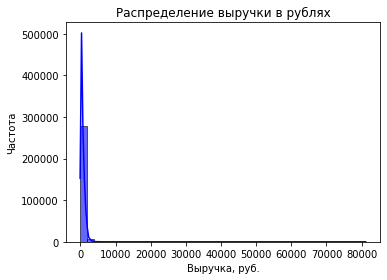

In [13]:
# Визуализация распределения
plt.figure(figsize=(10, 4))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(revenue_rub, kde=True, color='blue', label='Рубли', alpha=0.6, bins=40)


plt.title('Распределение выручки в рублях')
plt.xlabel('Выручка, руб.')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

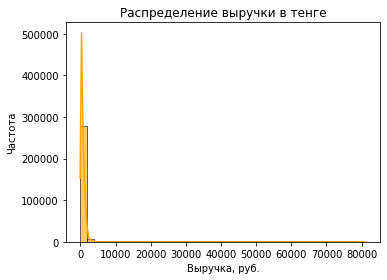

In [14]:
# Визуализация распределения
plt.figure(figsize=(10, 4))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(revenue_rub, kde=True, color='orange', label='Рубли', alpha=0.6, bins=40)


plt.title('Распределение выручки в тенге')
plt.xlabel('Выручка, руб.')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

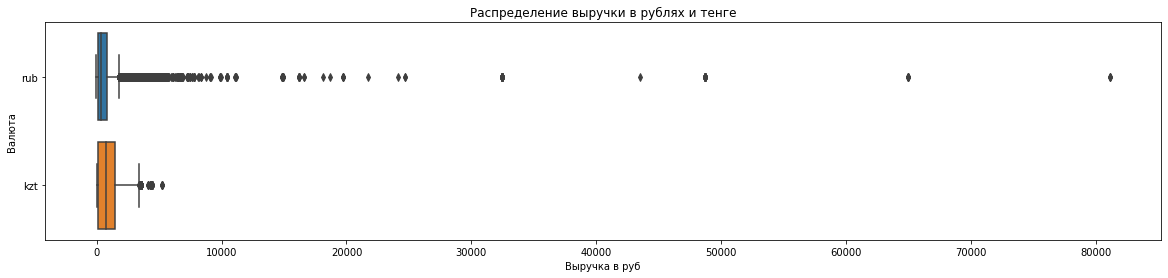

In [15]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(20, 4))

# Строим диаграмму размаха значений 
sns.boxplot(x='revenue_rub', y='currency_code', data=df)

# Добавляем заголовок и метки оси
plt.title('Распределение выручки в рублях и тенге')
plt.xlabel('Выручка в руб')
plt.ylabel('Валюта')

# Выводим график
plt.show()

По 3 графикам можно сказать о выбросах в обеих валютах, но в рублевой валюте отметим очень значительные выбросы, и в большом количестве, поэтому стоит отобрать значения по 99-му процентилю. 

In [16]:
# Вычисляем 99-й процентиль
percentile_99 = df['revenue_rub'].quantile(0.99)

# Отбираем значения, которые меньше или равны 99-му процентилю
df99 = df[df['revenue_rub'] <= percentile_99]


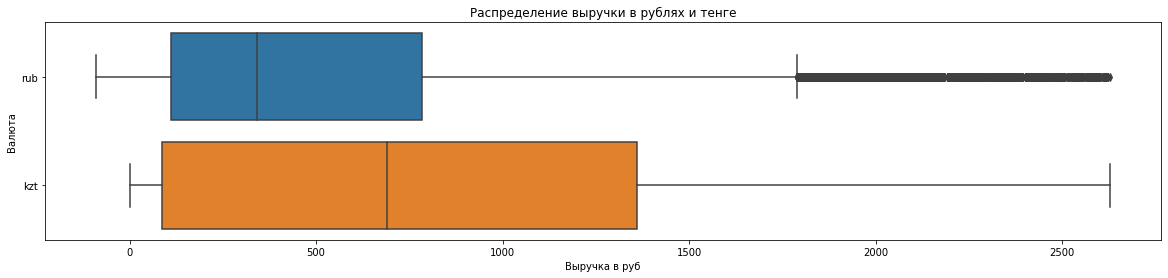

In [17]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(20, 4))

# Строим диаграмму размаха значений 
sns.boxplot(x='revenue_rub', y='currency_code', data=df99)

# Добавляем заголовок и метки оси
plt.title('Распределение выручки в рублях и тенге')
plt.xlabel('Выручка в руб')
plt.ylabel('Валюта')

# Выводим график
plt.show()

После отсечения по 99 процентилю выбросы в рублевой валюте остались, заметные. Медиана в тенге больше, чем в рублях (346 в рублях и 735 в тенге), при чем почти в 2 раза. Основная масса значений выручки в рублях более плотное (примерно от 150 до 650) уступает размеру в тенге(примерно от 100 до 1400):ящик с тенге больше ящика с рублями. Обратим внимание на более длинные усы справа у тенге - их длина соответствует выбросам в рублях.


Теперь посмотрим на статистики и распределения в количестве билетов.

In [18]:
tickets_count_rub = df99[df99['currency_code'] == 'rub']['tickets_count']

print("Общее количество билетов в рублях:", sum(tickets_count_rub))

print("\nСтатистики количества билетов в рублях:")
print(tickets_count_rub.describe())

Общее количество билетов в рублях: 776750

Статистики количества билетов в рублях:
count    283305.000000
mean          2.741745
std           1.164152
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          57.000000
Name: tickets_count, dtype: float64


In [19]:
tickets_count_kzt = df99[df99['currency_code'] == 'kzt']['tickets_count']

print("Общее количество билетов в тенге:", sum(tickets_count_kzt))

print("\nСтатистики количества билетов в тенге:")
print(tickets_count_kzt.describe())

Общее количество билетов в тенге: 12558

Статистики количества билетов в тенге:
count    4719.000000
mean        2.661157
std         1.083734
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: tickets_count, dtype: float64


Видим значительную разницу в количестве билетов в разных валютах, неравные группы могут не очень хорошо повлиять на анализ результатов. При этом, среднее значение в рублях и в тенге равное - чаще всего покупают по 3 билета, процентили 25-50-75 также равны: 2-3-3. А вот максимум в рублях значительно выше (57 против 6).

Посмотрим на распределение количества билетов графически.

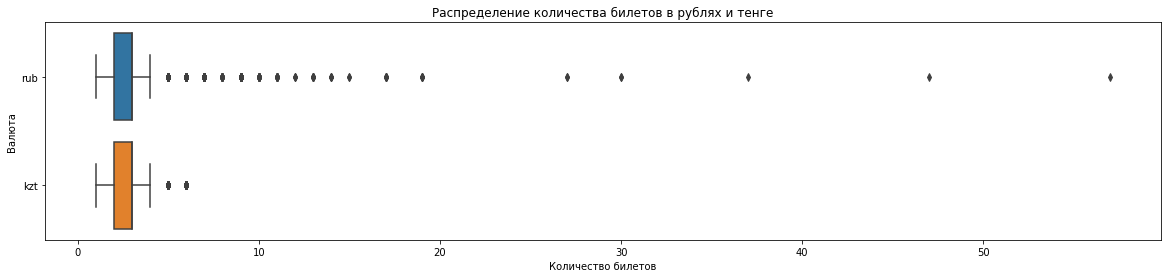

In [20]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(20, 4))

# Строим диаграмму размаха значений 
sns.boxplot(x='tickets_count', y='currency_code', data=df99)

# Добавляем заголовок и метки оси
plt.title('Распределение количества билетов в рублях и тенге')
plt.xlabel('Количество билетов')
plt.ylabel('Валюта')

# Выводим график
plt.show()

На диаграмме рахмаха ящики у усами одинаковые, но видны значительные выбросы в количестве билетов в рублях (свыше 50), и небольшие выбросы в тенге (до 6 билетов), а в основе количество билетов находится в пределах от 1 до 4 билетов в обеих валютах. Посмотрим на гистрограмму.


In [21]:
# группируем количеству билетов и по валюте 
t_counts = df99.groupby(['tickets_count','currency_code']).size().unstack()
t_counts

currency_code,kzt,rub
tickets_count,,
1,668.0,41143.0
2,1479.0,82261.0
3,1654.0,90143.0
4,680.0,53010.0
5,178.0,12682.0
6,60.0,3886.0
7,NaN,58.0
8,NaN,18.0
9,NaN,38.0


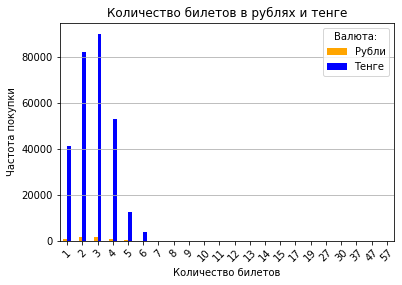

In [22]:
# Строим гистрограмму
t_counts.plot(kind='bar', color=['orange','blue'])
plt.title('Количество билетов в рублях и тенге')
plt.xlabel('Количество билетов')
plt.ylabel('Частота покупки')
plt.xticks(rotation=45)
plt.legend(title='Валюта:', labels=['Рубли', 'Тенге'])
plt.grid(axis='y')
plt.show()

Аналогичная картина: в основном покупают по 3 билета, чуть меньше по 2 билета, далее по 4 билета. Примерно 2 раза реже, чем 2 билета, покупают один билет. Не так часто покупают 5 и 6 билетов, для тенге 6 билетов - максимум. Для рублей возможны покупки билетов на группы: от 7 до 57 билетов, хотя это не так часто в сравнении с лидерами.

Теперь проверим явные и неявные дубликаты.

In [23]:
# проверка явных дубликатов в заказах
df99.duplicated().sum()


0

Явных дубликатов нет, теперь посмотрим наличие неявных дубликатов - то есть по ряду полей без учета номера заказа.

In [24]:
# выводим все названия столбцов для запроса на неявные дубликаты
df99.columns

Index(['order_id', 'user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
       'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev',
       'event_name', 'event_type_description', 'event_type_main', 'organizers',
       'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name',
       'venue_address', 'data', 'nominal', 'curs', 'cdx', 'revenue_rub'],
      dtype='object')

In [25]:
# проверка неявных дубликатов в заказах 
dup=df99.duplicated(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
       'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev',
       'event_name', 'event_type_description', 'event_type_main', 'organizers',
       'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name',
       'venue_address', 'data', 'nominal', 'curs', 'cdx', 'revenue_rub'], keep='first').sum()
dup

30

In [26]:
share_dup=round(dup/len(df99),4)

print("\nДоля неявных дубликатов:", share_dup)


Доля неявных дубликатов: 0.0001


Неявных дубликатов совсем небольшое количество (30 из 290 с лишним тысяч), менее 1 процента, можем их удалить.

In [27]:
# удаляем дубликаты с сохранением 1 встреченной строки
df99=df99.drop_duplicates(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
       'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev',
       'event_name', 'event_type_description', 'event_type_main', 'organizers',
       'region_name', 'city_name', 'city_id', 'venue_id', 'venue_name',
       'venue_address', 'data', 'nominal', 'curs', 'cdx', 'revenue_rub'], keep='first')

print("\nКоличество строк без неявных дубликатов:", len(df99))


Количество строк без неявных дубликатов: 287994


Неявные дубликаты удалены, осталось 287993 строк.  

In [28]:
print("\nПроцент удаленных строк с учетом 99 процентиля:", round(((len(df)-len(df99))/ len(df)*100),2))


Процент удаленных строк с учетом 99 процентиля: 0.98


Проводим преобразование типов данных - с приведением created_dt_msk, created_ts_msk  и data к типу даты и понижением разрядности в столбцах 'order_id', 'event_id', 'age_limit','tickets_count',
               'days_since_prev','city_id','venue_id' (с предварительным переводом из object в int по столбцам 'city_id','venue_id','days_since_prev'), а также для столбцов 'revenue', 'revenue_rub','total', где в любом случае необходим дробный формат, попробуем снизить с float64. 

In [29]:
# Преобразовываем тип данных столбцов  датой и временем
df99['created_dt_msk'] = pd.to_datetime(df99['created_dt_msk'])
df99['created_ts_msk'] = pd.to_datetime(df99['created_ts_msk'])
df99['data']=pd.to_datetime(df99['data'])


In [30]:
# Преобразовываем типы данных с понижением разрядности
for column in ['city_id','venue_id','days_since_prev']:
    df99[column] = df99[column].fillna(0).astype(int)
for column in [ 'order_id', 'event_id', 'age_limit','tickets_count',
               'city_id','venue_id', 'nominal']:
    df99[column] = pd.to_numeric(df99[column], downcast='integer')
df99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287994 entries, 0 to 290848
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287994 non-null  int32         
 1   user_id                 287994 non-null  object        
 2   created_dt_msk          287994 non-null  datetime64[ns]
 3   created_ts_msk          287994 non-null  datetime64[ns]
 4   event_id                287994 non-null  int32         
 5   cinema_circuit          287994 non-null  object        
 6   age_limit               287994 non-null  int8          
 7   currency_code           287994 non-null  object        
 8   device_type_canonical   287994 non-null  object        
 9   revenue                 287994 non-null  float64       
 10  service_name            287994 non-null  object        
 11  tickets_count           287994 non-null  int8          
 12  total                   287994

Видим снижение разрядности по int, остались во float64 4 столбца

In [31]:
# Понижаем разрядность
for column in [ 'revenue_rub', 'revenue', 'total', 'curs']:
    df99[column] = pd.to_numeric(df99[column], downcast='float')
df99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287994 entries, 0 to 290848
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287994 non-null  int32         
 1   user_id                 287994 non-null  object        
 2   created_dt_msk          287994 non-null  datetime64[ns]
 3   created_ts_msk          287994 non-null  datetime64[ns]
 4   event_id                287994 non-null  int32         
 5   cinema_circuit          287994 non-null  object        
 6   age_limit               287994 non-null  int8          
 7   currency_code           287994 non-null  object        
 8   device_type_canonical   287994 non-null  object        
 9   revenue                 287994 non-null  float32       
 10  service_name            287994 non-null  object        
 11  tickets_count           287994 non-null  int8          
 12  total                   287994

Отлично, теперь по столбцам 'revenue_rub', 'revenue', 'total', 'curs' разрядность снижена до float32,
преобразован в корректный тип данных в столбцах с датой и временем, также снижена разрядость в целочисленым столбцам, в том числе до int8 по некоторым среди 'order_id', 'event_id', 'age_limit','tickets_count', 'city_id','venue_id', 'nominal'.    
  
 Теперь создадим новые столбцы для дальнейшего анализа:   
 -	one_ticket_revenue_rub — выручка с продажи одного билета на мероприятие,  
 -	month — месяц оформления заказа,  
 - season — информация о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.


In [32]:
# определяем стоимость билета
df99['one_ticket_revenue_rub']=round((df99['revenue_rub']/df99['tickets_count']),2)
# выделяем месяц из даты
df99['month']= df99['created_dt_msk'].dt.month

In [33]:
# Функция для определения сезона
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'
# Применяем функцию к столбцу с месяцем для создания нового столбца 'season'
df99['season'] = df99['month'].apply(get_season)
df99[['revenue_rub', 'one_ticket_revenue_rub', 'month','season']].head()

,revenue_rub,one_ticket_revenue_rub,month,season
0,1521.939941,380.480011,8,Лето
1,289.450012,144.729996,7,Лето
2,1258.569946,314.640015,10,Осень
3,8.490000,4.240000,7,Лето
4,1390.410034,463.470001,10,Осень


In [34]:
df99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287994 entries, 0 to 290848
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287994 non-null  int32         
 1   user_id                 287994 non-null  object        
 2   created_dt_msk          287994 non-null  datetime64[ns]
 3   created_ts_msk          287994 non-null  datetime64[ns]
 4   event_id                287994 non-null  int32         
 5   cinema_circuit          287994 non-null  object        
 6   age_limit               287994 non-null  int8          
 7   currency_code           287994 non-null  object        
 8   device_type_canonical   287994 non-null  object        
 9   revenue                 287994 non-null  float32       
 10  service_name            287994 non-null  object        
 11  tickets_count           287994 non-null  int8          
 12  total                   287994

Все 4 новые столбца сформированы, с корректным типом данных.

**Промежуточный вывод**  
Удалены 30 неявных дубликатов, так как их доля незначительна в большом объеме данных (всего 0.0001). Потери после обработки данных составили менее 1 % данных.

Проведена работа по приведению данных к правильному типу: даты к datetime64[ns], по количественным характеристикам снижена разрядность как в int (до int8 - age_limit, tickets_count, nominal, до int16 - venue_id, до int32 - order_id, event_id,city_id), так и во float - до float32: revenue, total, curs, revenue_rub, one_ticket_revenue_rub.  

После предобработки и отсечению по 99 процентилю значений выручки в итоговом датафрейме df99 содержатся 290849 строк и 32 столбца, с учетом вновь сформированных: 'revenue_rub', 'one_ticket_revenue_rub', 'month', 'season':
- revenue_rub - выручка в рублях для всех покупок, дублирующая revenue для заказов в рублях и рассчетная для тенге - с помощью данных с курсом валют путем деления revenue на 100 (nominal) и умножения на курс (curs) на соответствующую дату из таблицы `tenge`.  
- one_ticket_revenue_rub — выручка с продажи одного билета на мероприятие, рассчитанная как деление выручки на количество билетов в заказе.  
- month — месяц оформления заказа, выделенный из даты заказа и обозначаемый номером месяц (январь - 1, февраль -2 и т.д.).  
- season — с помощью функции для определения сезона в зависимости от месяца выделены  лето, осень, зима и весна.  



## Исследовательский анализ данных

### Анализ распределения заказов по сегментам и их сезонные изменения

Проанализируем изменение пользовательской активности или пользовательского интереса в связи с сезонностью, а именно изучим динамику по таким разрезам:
• тип мероприятия event_type_main;  
• тип устройства device_type_canonical;  
• категория мероприятий по возрастному рейтингу age_limit.  


#### Для каждого месяца найдем количество заказов.

In [35]:
# Подсчитываем количество заказов по месяцам
monthly_orders = df99.groupby('month')['order_id'].count().reset_index()

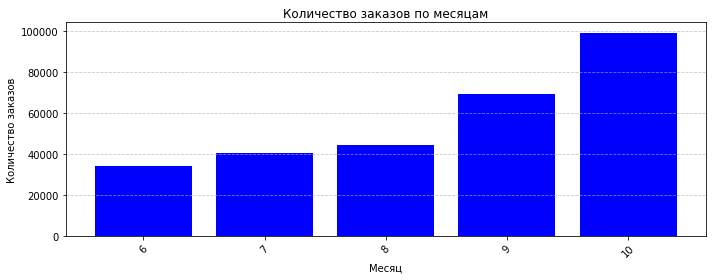

In [36]:
# Визуализация результатов
plt.figure(figsize=(10, 4))
plt.bar(monthly_orders['month'], monthly_orders['order_id'], color='blue')
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)  # Повернуть метки по оси X
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Чтобы избежать наложения меток
plt.show()

Фиксируем увеличение заказов от июня к ноябрю 2024 года, рост числа заказов значительный, в октябре более, чем вдвое превышает показатели летних месяцев.

#### Для осеннего и летнего периодов сравниим распределение заказов билетов 

Распределения рассмотрим по типу мероприятия, типу устройства, категории мероприятия по возрастному рейтингу.¶

In [37]:
# типу мероприятия
event_type_main_table = df99.pivot_table(index='event_type_main', 
                                       values='order_id', aggfunc='count', 
                                         columns='season')

event_type_main_table


season,Лето,Осень
event_type_main,,
выставки,2416,2436
другое,32369,33225
концерты,50558,62905
спорт,3006,18881
стендап,6348,6924
театр,23958,42762
ёлки,273,1695


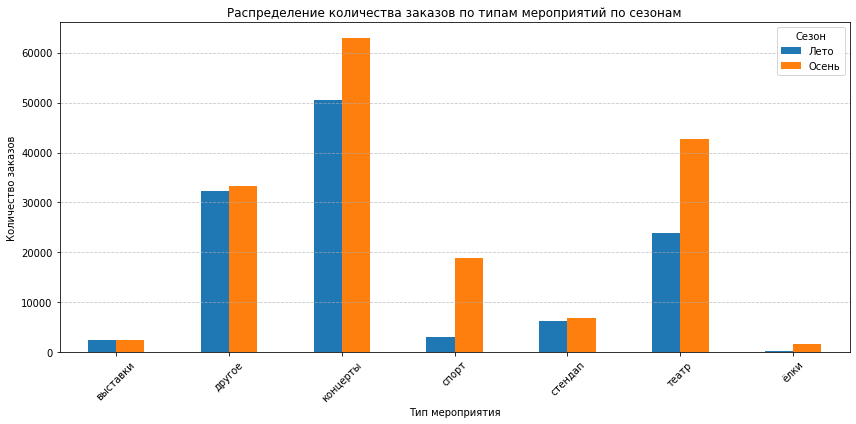

In [38]:
# Визуализация столбчатой диаграммы
event_type_main_table.plot(kind='bar', figsize=(12, 6))

plt.title('Распределение количества заказов по типам мероприятий по сезонам')
plt.xlabel('Тип мероприятия')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)  # Повернуть метки по оси X для лучшей читаемости
plt.legend(title='Сезон')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Чтобы избежать наложения меток
plt.show()

Почти по всем категориям видим, что в осенние месяцы количество заказов значительно превышает летние, также отметим наибольшее число заказов по концертам, далее - театры и другое. Самое меньшее количество у елок.


Однако поскольку абсолютное количество заказов в разные сезоны может меняться, при сопоставлении результатов для каждого сегмента использовать доли. 

In [39]:
# Общее количество заказов
total_orders = df99['order_id'].count()

# Подсчет количества заказов по типам мероприятий в каждом сезоне
event_type_main_orders = df99.groupby(['season', 'event_type_main']).size().reset_index(name='order_count')

# Вычисляем доли по сезонам
event_type_main_orders['share_event_type'] = event_type_main_orders.groupby(
    'season')['order_count'].transform(lambda x: x / x.sum() * 100)


In [40]:
# создание сводной таблицы для визуализации
event_type = event_type_main_orders.pivot(index='event_type_main', columns='season', 
                                          values='share_event_type')
event_type

season,Лето,Осень
event_type_main,,
выставки,2.031481,1.442889
другое,27.217308,19.679792
концерты,42.511435,37.259815
спорт,2.527580,11.183571
стендап,5.337683,4.101215
театр,20.144962,25.328737
ёлки,0.229551,1.003980


In [41]:
# Проверка корректности расчетов
# Суммируем доли по сезонам
sums = event_type.sum(axis=0)

# Проверяем, что сумма по каждому сезону равна 100%
correctness_check = (sums == 100).all()

# Вывод результатов
print("Суммы по сезонам:")
print(sums)


Суммы по сезонам:
season
Лето     100.0
Осень    100.0
dtype: float64


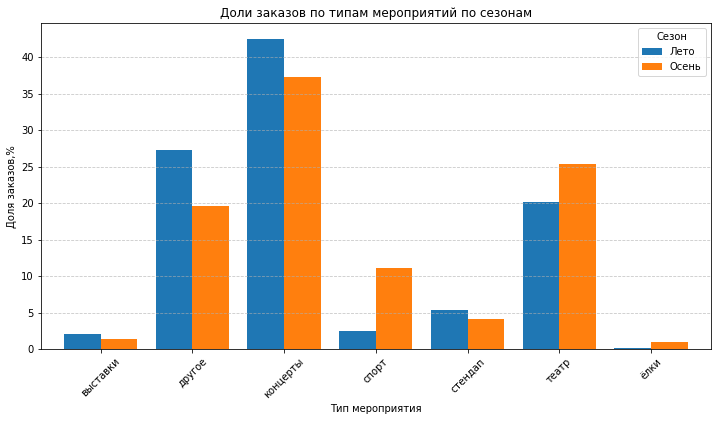

In [42]:
# визуализируем
event_type.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Доли заказов по типам мероприятий по сезонам')
plt.xlabel('Тип мероприятия')
plt.ylabel('Доля заказов,%')
plt.xticks(rotation=45) 
plt.legend(title='Сезон')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Можем увидеть аналогичную картину роста доли заказов по типам мероприятий в осенние месяцы, опять же на первом месте концерты, на последнем - елки.

Проведем такое же анализ долей заказов по типу устройства и категория мероприятия по возрастному рейтингу. 

In [43]:
# количество заказов по типам устройств в каждом месяце
device_orders = df99.groupby(['season', 'device_type_canonical']).size().reset_index(
    name='order_count')
# вычисляем доли
device_orders['share_device'] =device_orders.groupby('season')['order_count'].transform(lambda x: x / x.sum() * 100)

In [44]:
# Проверка корректности расчетов
# Суммируем доли по сезонам
sums = device_orders.groupby('season')['share_device'].sum()

# Проверяем, что сумма по каждому сезону равна 100%
correctness_check = (sums == 100).all()

# Вывод результатов
print("Суммы долей по сезонам:")
print(sums)

Суммы долей по сезонам:
season
Лето     100.0
Осень    100.0
Name: share_device, dtype: float64


In [45]:
# создание сводной таблицы для визуализации
device=device_orders.pivot(index='device_type_canonical', columns='season',values='share_device')
device

season,Лето,Осень
device_type_canonical,,
desktop,19.309407,20.349423
mobile,80.690593,79.650577


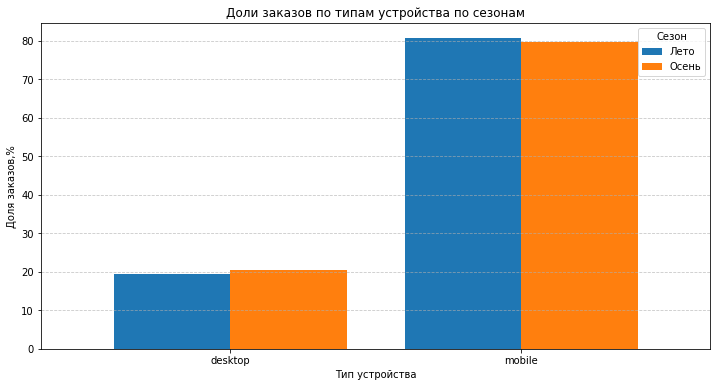

In [46]:
# визуализируем
device.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Доли заказов по типам устройства по сезонам')
plt.xlabel('Тип устройства')
plt.ylabel('Доля заказов,%')
plt.xticks(rotation=0)  
plt.legend(title='Сезон')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Также видим, что доля заказов растет в осенние месяцы в сравнении с летними, отметим, что заказы с мобильного значительно  превышают заказы с ПК в каждом сезоне.

In [47]:
# количество заказов по типам устройств в каждом месяце
age_limit_orders = df99.groupby(['season', 'age_limit']).size().reset_index(
    name='order_count')
# вычисляем доли
age_limit_orders['share_age_limit'] =age_limit_orders.groupby('season')['order_count'].transform(lambda x: x / x.sum() * 100)


In [48]:
# Проверка корректности расчетов
# Суммируем доли по сезонам
sums = age_limit_orders.groupby('season')['share_age_limit'].sum()
# Проверяем, что сумма по каждому сезону равна 100%
correctness_check = (sums == 100).all()

# Вывод результатов
print("Суммы долей по сезонам:")
print(sums)

Суммы долей по сезонам:
season
Лето     100.0
Осень    100.0
Name: share_age_limit, dtype: float64


In [49]:
# создание сводной таблицы для визуализации
age = age_limit_orders.pivot(index='age_limit', columns='season', 
                                          values='share_age_limit')
age

season,Лето,Осень
age_limit,,
0,17.964816,23.590761
6,18.277043,17.696180
12,20.335057,22.090613
16,28.360639,26.193071
18,15.062445,10.429375


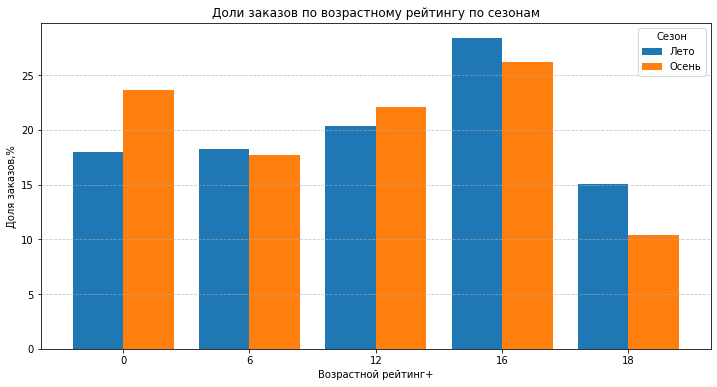

In [50]:
# визуализируем
age.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Доли заказов по возрастному рейтингу по сезонам')
plt.xlabel('Возрастной рейтинг+')
plt.ylabel('Доля заказов,%')
plt.xticks(rotation=0)  
plt.legend(title='Сезон')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Также видим картину роста доли заказов в осенние месяцы. По возрастному рейтингу летом и осенью лидирует 16+, наименее высокие показатели у 18+. 

#### Изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью 

Для изменения выручки возьмем среднее значение из столбца one_ticket_revenue_rub.

In [51]:
avg_one_ticket_rev = df99.pivot_table(index='event_type_main', columns='season', 
                                      values='one_ticket_revenue_rub', aggfunc='mean')


avg_one_ticket_rev

season,Лето,Осень
event_type_main,,
выставки,86.415657,90.603416
другое,77.434105,76.115364
концерты,302.347778,269.319672
спорт,50.762207,49.969761
стендап,218.586227,231.467041
театр,214.398926,176.231369
ёлки,271.435486,230.309357


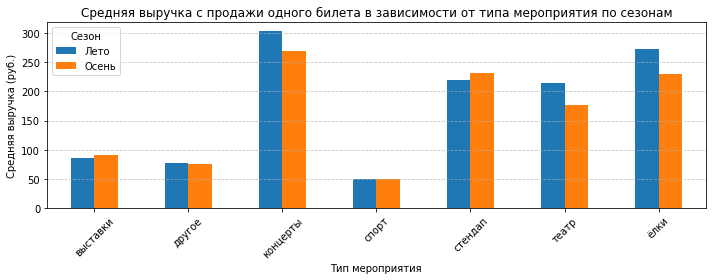

In [52]:
# Построение столбчатой диаграммы
avg_one_ticket_rev.plot(kind='bar', figsize=(10, 4))
plt.title('Средняя выручка с продажи одного билета в зависимости от типа мероприятия по сезонам')
plt.xlabel('Тип мероприятия')
plt.ylabel('Средняя выручка (руб.)')
plt.xticks(rotation=45)  # Повернуть метки по оси X для лучшей читаемости
plt.legend(title='Сезон')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Чтобы избежать наложения меток
plt.show()


Видна динамика средней стоимости билета в разрезе разных категорий мероприятий: самая высокая средняя выручка с продажи 1 билета по концертам, при чем видим ее снижение осенью, на втором месте елки также со снижением средней стоимости билета осенью, по театрам на 3 месте такая же динамика. Стендап и выставки, идующие следом за театрами по размеру средней стоимости билета, наоборот увеличили показатель осенью, другому осень незначительно снизила исследуемый показатель. На последнем месте почти не меняется в разные сезоны спорт.


In [53]:
# Добавляем столбец с относительной разницей
avg_one_ticket_rev['change'] = (avg_one_ticket_rev['Осень'] / avg_one_ticket_rev['Лето']) - 1

# Умножаем на 100, если нужно выразить в процентах
avg_one_ticket_rev['change'] *= 100

# Сортируем по столбцу 'change'
avg_one_ticket_rev = avg_one_ticket_rev.sort_values(by='change')

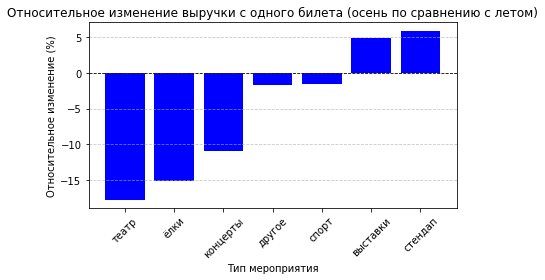

In [54]:
# Визуализация относительного изменения
plt.bar(avg_one_ticket_rev.index, avg_one_ticket_rev['change'], color='blue')
plt.title('Относительное изменение выручки с одного билета (осень по сравнению с летом)')
plt.xlabel('Тип мероприятия')
plt.ylabel('Относительное изменение (%)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Добавляем линию на уровне 0
plt.xticks(rotation=45)  # Повернуть метки по оси X для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Чтобы избежать наложения меток
plt.show()

Осенью для выставок и стендапов рост, почти не измениись значения по другому и спорту (с небольшим снижением), снижение по концертам, елкам и театрам.

Таким образом, в **промежуточном выводе** отметим, что изменение средней стоимости одного билета в разрезе разных типов мероприятий различно: рост осенью только для выставок и стендапов, по остальным снижение.  
Распределение заказов в каждой категории с наступлением осени меняется по-разному: по количеству заказов в лидерах концерты, театры и другое (елки на последнем месте). Но стабильно больше заказов делается с мобильного устройства, для 12+ и 16+.


###  Осенняя активность пользователей

Проанализируем динамику изменений по дням для:   
- общего числа заказов;  
-	количества активных пользователей DAU;  
-	среднего числа заказов на одного пользователя;  
-	средней стоимости одного билета.  

Для анализа осенней активности пользователей создадим сводную таблицу (возьмем сезон только Осень), где по дням рассчитаем число заказов и число уникальных пользователей, а затем найти величину — количество заказов на одного пользователя. Полученные результаты визуализируем с помощью линейного графика. 

In [55]:
# Фильтрация данных только для осени
df_autumn = df99[df99['season'] == 'Осень']


In [56]:
# сводим таблицу 
autumn_table = df_autumn.groupby('created_dt_msk').agg(
    total_orders=('order_id', 'count'),
    unique_users=('user_id', 'nunique'),
    avg_ticket_price=('one_ticket_revenue_rub', 'mean')
).reset_index()

# расчет среднего числа заказов на одного пользователя
autumn_table['avg_orders_per_user'] = autumn_table['total_orders'] / autumn_table['unique_users']
autumn_table.head()


,created_dt_msk,total_orders,unique_users,avg_ticket_price,avg_orders_per_user
0,2024-09-01,1331,565,201.678360,2.355752
1,2024-09-02,1380,574,189.464706,2.404181
2,2024-09-03,5114,778,80.502640,6.573265
3,2024-09-04,1775,686,178.212799,2.587464
4,2024-09-05,1945,740,189.746017,2.628378


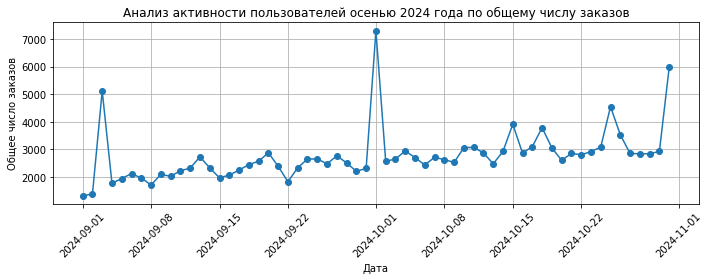

In [57]:
# Визуализация
plt.figure(figsize=(10, 4))

# Линейные графики
plt.plot(autumn_table['created_dt_msk'], autumn_table['total_orders'], label='Общее число заказов', marker='o')

# Настройки графика
plt.title('Анализ активности пользователей осенью 2024 года по общему числу заказов')
plt.xlabel('Дата')
plt.ylabel('Общее число заказов')
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

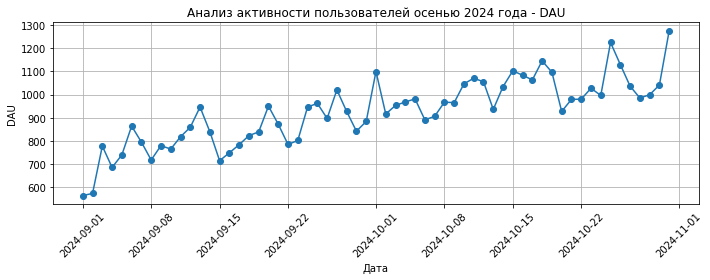

In [58]:
# Визуализация
plt.figure(figsize=(10, 4))

# Линейные графики
plt.plot(autumn_table['created_dt_msk'], autumn_table['unique_users'], 
         label='Количество активных пользователей (DAU)', marker='o')

# Настройки графика
plt.title('Анализ активности пользователей осенью 2024 года - DAU')
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

По общему числу заказов и количеству активных пользоватлетей похожая картина осенью 2024 года -  динамичный (то спады, то повышения показателей) восходящий в целом тренд с заметными пиками активности пользователей и числом заказов 3 сентября и 1 октября и ростом к ноябрю 2024 года.

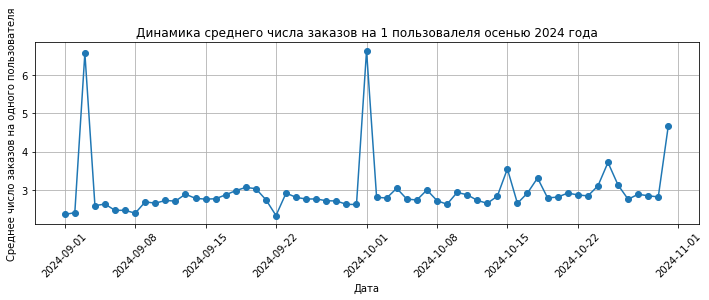

In [59]:
# Визуализация
plt.figure(figsize=(10,4))

# Линейные графики
plt.plot(autumn_table['created_dt_msk'], autumn_table['avg_orders_per_user'], 
         label='Среднее число заказов на одного пользователя', marker='o')

# Настройки графика
plt.title('Динамика среднего числа заказов на 1 пользовалеля осенью 2024 года')
plt.xlabel('Дата')
plt.ylabel('Среднее число заказов на одного пользователя')
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

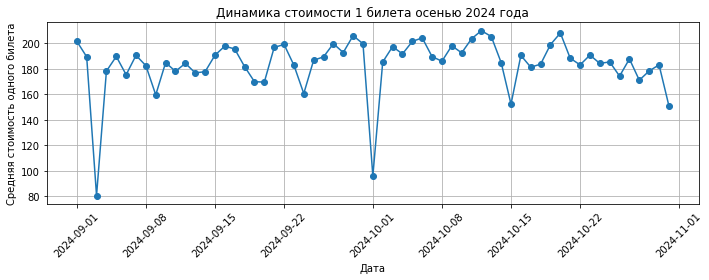

In [60]:
# Визуализация
plt.figure(figsize=(10,4))

# Линейные графики
plt.plot(autumn_table['created_dt_msk'], autumn_table['avg_ticket_price'], 
         label='Средняя стоимость одного билета', marker='o')

# Настройки графика
plt.title('Динамика стоимости 1 билета осенью 2024 года')
plt.xlabel('Дата')
plt.ylabel('Средняя стоимость одного билета')
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

Аналогичные заметные пики значений видим в среднем числе заказов на 1 пользоватлеля: 3 сентября и 1 октября и рост к нобрю 2024 года, здесь тенд достаточно ровный. В указанные даты наблюдаем самые низкие значения по средней стоимости одного билета и нисходящий тренд по данному показателю.

Теперь изучим недельную цикличность: cравним пользовательскую активность (DAU) в будни и выходные, для этого создаем новые столбцы с днем недели и weekend признаком Выходной или будний день.

In [61]:
# Добавляем столбец с днем недели
autumn_table['day_of_week'] = autumn_table['created_dt_msk'].dt.day_name()

# Функция для классификации дня на будний или выходной
def classify_weekend(day):
    if day in ['Saturday', 'Sunday']:
        return 'Выходной'
    else:
        return 'Будний'

# Используем функцию для создания нового столбца
autumn_table['weekend'] = autumn_table['day_of_week'].apply(classify_weekend)

autumn_table.head()

,created_dt_msk,total_orders,unique_users,avg_ticket_price,avg_orders_per_user,day_of_week,weekend
0,2024-09-01,1331,565,201.678360,2.355752,Sunday,Выходной
1,2024-09-02,1380,574,189.464706,2.404181,Monday,Будний
2,2024-09-03,5114,778,80.502640,6.573265,Tuesday,Будний
3,2024-09-04,1775,686,178.212799,2.587464,Wednesday,Будний
4,2024-09-05,1945,740,189.746017,2.628378,Thursday,Будний


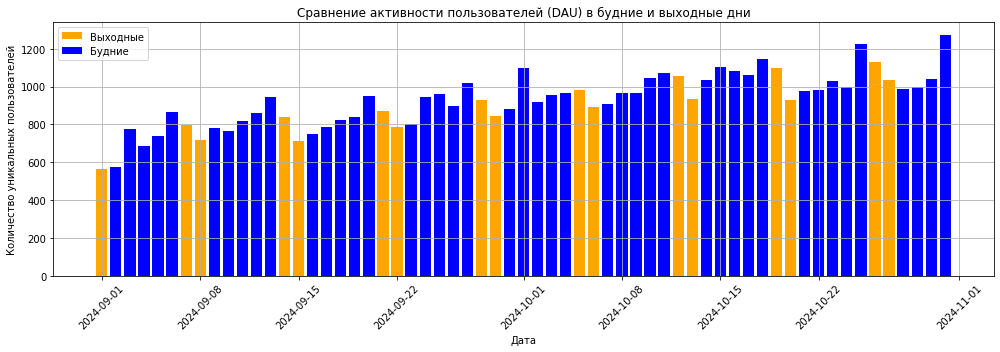

In [62]:
# Создаем сводную таблицу для удобства визуализации
weekend_pivot = autumn_table.pivot(index='created_dt_msk', columns='weekend', values='unique_users')

# визуализируем
plt.figure(figsize=(14, 5))
plt.bar(weekend_pivot.index, weekend_pivot['Выходной'], label='Выходные', color='orange')
plt.bar(weekend_pivot.index, weekend_pivot['Будний'], label='Будние', color='blue')
plt.title('Сравнение активности пользователей (DAU) в будние и выходные дни')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных пользователей')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Наглядно видим снижение активности (DAU) в выходные и в основном повышение в будни.  
Cравним активность пользователей осенью 2024 года по общему числу заказов.

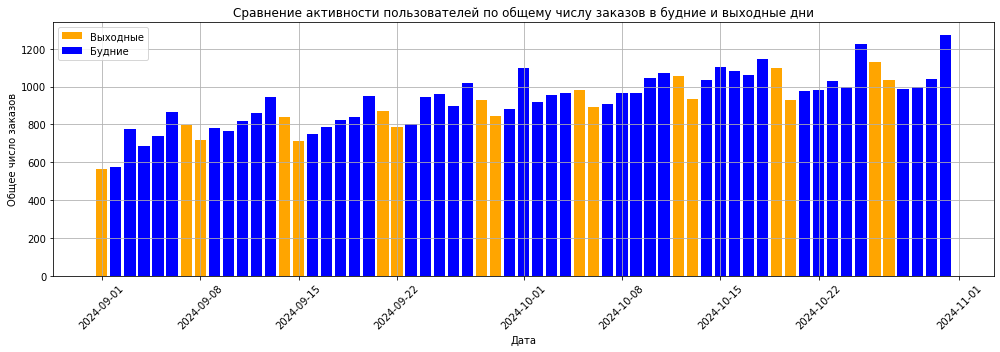

In [63]:
# Создаем сводную таблицу для удобства визуализации
weekend_pivot_ = autumn_table.pivot(index='created_dt_msk', columns='weekend', values='total_orders')

# визуализируем
plt.figure(figsize=(14, 5))
plt.bar(weekend_pivot.index, weekend_pivot['Выходной'], label='Выходные', color='orange')
plt.bar(weekend_pivot.index, weekend_pivot['Будний'], label='Будние', color='blue')
plt.title('Сравнение активности пользователей по общему числу заказов в будние и выходные дни')
plt.xlabel('Дата')
plt.ylabel('Общее число заказов')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Аналогичная картина с повышением общего числа заказов в будни и снижением в выходные.

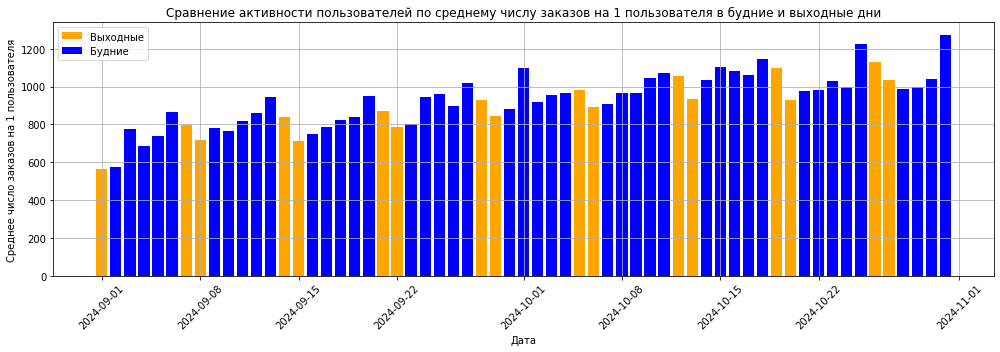

In [64]:
# Создаем сводную таблицу для удобства визуализации
weekend_pivot_ = autumn_table.pivot(index='created_dt_msk', columns='weekend', values='avg_orders_per_user')

# визуализируем
plt.figure(figsize=(14, 5))
plt.bar(weekend_pivot.index, weekend_pivot['Выходной'], label='Выходные', color='orange')
plt.bar(weekend_pivot.index, weekend_pivot['Будний'], label='Будние', color='blue')
plt.title('Сравнение активности пользователей по среднему числу заказов на 1 пользователя в будние и выходные дни')
plt.xlabel('Дата')
plt.ylabel('Среднее число заказов на 1 пользователя')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Снова похожая динамика с ростом в будни и снижением в выходные. Это может объяснить стоимостью 1 билета, посмотрим на визуализации.

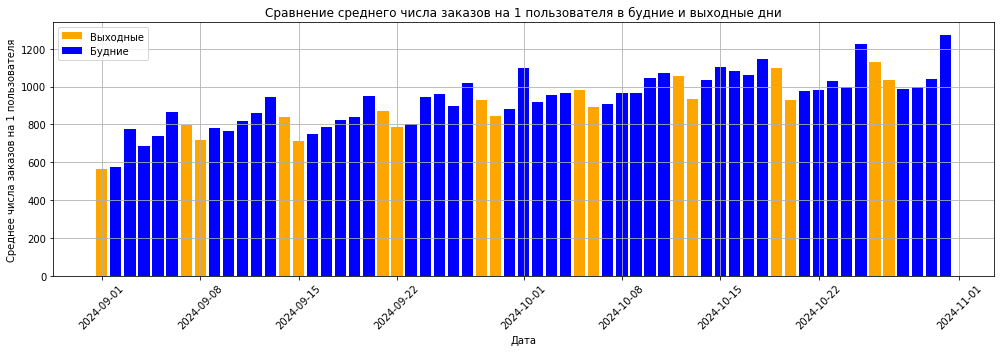

In [65]:
# Создаем сводную таблицу для удобства визуализации
weekend_pivot_ = autumn_table.pivot(index='created_dt_msk', columns='weekend', values='avg_orders_per_user')

# визуализируем
plt.figure(figsize=(14, 5))
plt.bar(weekend_pivot.index, weekend_pivot['Выходной'], label='Выходные', color='orange')
plt.bar(weekend_pivot.index, weekend_pivot['Будний'], label='Будние', color='blue')
plt.title('Сравнение среднего числа заказов на 1 пользователя в будние и выходные дни')
plt.xlabel('Дата')
plt.ylabel('Среднее числа заказов на 1 пользователя')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Дейсьвительно, видим рост в понедельник в сравнении с вс, дальнейший рост в будни и снижение в выходные (как в сравнении с пятницей, так и от субботы к воскресенью).

**Промежуточный вывод по осенней активности 2024**  
Наблюдается восходящий тренд пользовательской активности от сентября к ноябрю, по 3 показателям - общего числа заказов, количества активных пользователей DAU, среднего числа заказов на одного пользователя с пиками 3 сентября и 1 октября, и рост к нобрю 2024 года. В эти же дни 3 сентября и 1 октября были самые низкие цены на 1 билет, по ценам наоборот в целом нисходящий немного тренд - этим, вероятно, можно объяснить такую активность пользователей и соответственно высокие значения выручки.  
Относительно недельной цикличности можно отднозначно сказать, что DAU в основном растет в будни и неизменно падает в выходные. 

### Популярные события и партнёры

Для каждого региона посчитаем уникальное количество мероприятий и общее число заказов: исследуем не только абсолютные значения, но и доли: для каждого региона - долю проводимых мероприятий от их общего числа или долю заказов в регионе от общего числа заказов.

In [66]:
# Группируем данные по региону и считаем уникальные мероприятия и заказы
region_table = df99.groupby('region_name').agg(
    unique_events=('event_id', 'nunique'),
    count_orders=('order_id', 'count')
).reset_index()
region_table

,region_name,unique_events,count_orders
0,Белоярская область,57,199
1,Берестовский округ,39,393
2,Берёзовская область,166,1282
3,Боровлянский край,97,1721
4,Верховинская область,7,45
...,...,...,...
76,Шанырский регион,28,2757
77,Широковская область,1232,16172
78,Яблоневская область,535,6123
79,Ягодиновская область,120,1041


In [67]:
# Суммируем уникальные мероприятия и заказы для вычислений долей
total_events = region_table['unique_events'].sum()  # Общее количество уникальных мероприятий
total_orders = region_table['count_orders'].sum()    # Общее количество заказов

# Формируем доп. столбец - долю проводимых мероприятий от их общего числа
region_table['share_unique_events'] = region_table['unique_events'] / total_events

# Формируем доп. столбец - долю заказов в регионе от общего числа заказов
region_table['share_order_id'] = region_table['count_orders'] / total_orders

# Вывод информации о таблице
region_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region_name          81 non-null     object 
 1   unique_events        81 non-null     int64  
 2   count_orders         81 non-null     int64  
 3   share_unique_events  81 non-null     float64
 4   share_order_id       81 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.3+ KB


In [68]:
# Сортировка по доле уникальных мероприятий
region_events = region_table.sort_values(by='share_unique_events', ascending=False)

region_events.head()

,region_name,unique_events,count_orders,share_unique_events,share_order_id
23,Каменевский регион,5940,89749,0.265605,0.311893
60,Североярская область,3800,43752,0.169916,0.152045
77,Широковская область,1232,16172,0.055089,0.056200
57,Светополянский округ,1075,7502,0.048068,0.026071
52,Речиновская область,702,6268,0.031390,0.021782


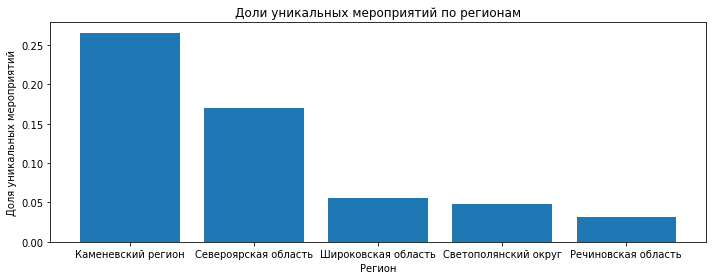

In [69]:
region_events_v=region_events.head()

plt.figure(figsize=(10, 4))
plt.bar(region_events_v['region_name'], region_events_v['share_unique_events'])
plt.xlabel('Регион')
plt.ylabel('Доля уникальных мероприятий')
plt.title('Доли уникальных мероприятий по регионам')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

По долям сортировка значений дала пятерку лидеров: наибольшее разнообразие мероприятий предлагается в:  
    Каменевский регион, Североярская область, Широковская область, Светополянский округ, Речиновская область. Каменевский регион и Североярская область-  2 явных лидера со значительным отрывом: 26,6% и около 17%. У остальных - 5,5% и менее.

In [70]:
# Сортировка по доле заказов в регионе от общего числа заказов
region_orders = region_table.sort_values(by='share_order_id', ascending=False)
region_orders.head()

,region_name,unique_events,count_orders,share_unique_events,share_order_id
23,Каменевский регион,5940,89749,0.265605,0.311893
60,Североярская область,3800,43752,0.169916,0.152045
77,Широковская область,1232,16172,0.055089,0.056200
42,Медовская область,504,13893,0.022536,0.048280
45,Озернинский край,349,10405,0.015605,0.036159


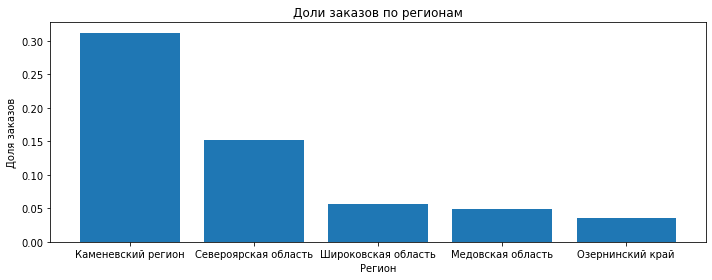

In [71]:
region_orders_v=region_orders.head()

plt.figure(figsize=(10, 4))
plt.bar(region_orders_v['region_name'], region_orders_v['share_order_id'])
plt.xlabel('Регион')
plt.ylabel('Доля заказов')
plt.title('Доли заказов по регионам')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

По доле заказов тройка первых аналогичная, далее идут Медовская область, Озернинский край. Отметим заметные доли у первых двух регионов - 31,2% и  15,2%, то есть опять в лидерах Каменевский регион и Североярская область. У 3 места - 5,6 %, у 4 и 5 - менее 5%, то есть уже не такие значительные.
    


Проанализируем не только топ-категории, но и общее распределение данных между категориями.

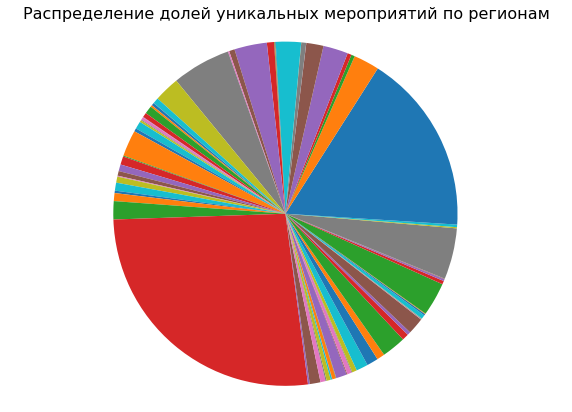

In [72]:
# Данные для круговой диаграммы
sizes = region_table['share_unique_events']  # Доли уникальных мероприятий
labels = region_table['region_name']  
# Создание круговой диаграммы
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=['']*len(labels), autopct='', startangle=140)
plt.title('Распределение долей уникальных мероприятий по регионам', fontsize=16)
plt.axis('equal')  # Равные оси для соблюдения круговой формы
plt.show()

Доли уникальнх мероприятий в большинстве регионов не очень велики - множество тонких разноцветных секторов: ка отметили ранее - менее 5% от всех мероприятий, однако есть явные лидеры, которых мы отметили и в которых проводятся 26,6% и около 17% мероприятий (заметные большие красный и синий сегменты)  - Каменевский регион, Североярская область соответственно.

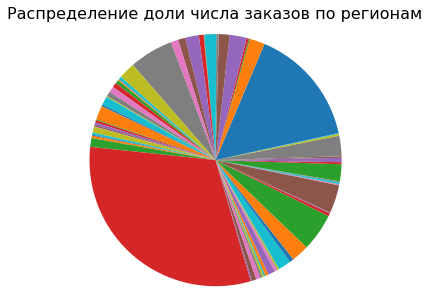

In [73]:
# Данные для круговой диаграммы
labels = region_table['region_name']  # Названия регионов
sizes = region_table['share_order_id']  # Доли уникальных мероприятий

# Создание круговой диаграммы
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=['']*len(labels), autopct='', startangle=140)
plt.title('Распределение доли числа заказов по регионам', fontsize=16)
plt.axis('equal')  # Равные оси для соблюдения круговой формы
plt.show()

Очень похожая картина по распределению долей заказов в регионе на распределение долей уникальнх мероприятий: в большинстве регионов доля заказов менее 5,6% от общего числа заказов (множество разноцветных кусочков), однако есть снова лидеры: 31,2% и около 15,2%  - Каменевский регион, Североярская область соответственно, как мы видели в топ-5.

Для каждого **билетного партнёра** посчитаем общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов с акцентом на наиболее активных партнёрах: аналогично проведем расчет долей.

In [74]:
# Группируем данные по билетному партнеру
service_table = df99.groupby('service_name').agg(
    unique_events=('event_id', 'nunique'),
    count_orders=('order_id', 'count'),
    summary_revenue=('revenue_rub', 'sum'))
#  рассчитаем общую сумму выручки
total_sum_revenue=service_table['summary_revenue'].sum()
ser_total_events=service_table['unique_events'].sum()
ser_total_orders=service_table['count_orders'].sum()
# формируем доп. столбец - долю уникальных мероприятий билетного партнера от общего числа заказов
service_table['share_unique_events']=service_table['unique_events']/ser_total_events
# формируем доп. столбец - долю заказов билетного партнера от общего числа заказов
service_table['share_order_id']=service_table['count_orders']/ser_total_orders
# формируем доп. столбец - долю выручки от общей выручки
service_table['share_revenue']=service_table['summary_revenue']/total_sum_revenue
service_table.info()


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Crazy ticket! to Яблоко
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_events        36 non-null     int64  
 1   count_orders         36 non-null     int64  
 2   summary_revenue      36 non-null     float32
 3   share_unique_events  36 non-null     float64
 4   share_order_id       36 non-null     float64
 5   share_revenue        36 non-null     float32
dtypes: float32(2), float64(2), int64(2)
memory usage: 1.7+ KB


Таблица по билетным партнерам с абсолюными и долевыми значениями готова. Теперь проанализируем не только топ-категории, но и общее распределение данных между категориями c помощью 3 круговых диаграмм.


In [75]:
share_uevent=service_table.sort_values(by='share_unique_events', ascending=False)
share_uevent.head()

,unique_events,count_orders,summary_revenue,share_unique_events,share_order_id,share_revenue
service_name,,,,,,
Лови билет!,4872,40825,16730150.0,0.199599,0.141756,0.112227
Билеты без проблем,4256,63254,24856576.0,0.174362,0.219637,0.166739
Билеты в руки,3536,40305,13204749.0,0.144865,0.139951,0.088578
Облачко,2335,26410,18609296.0,0.095661,0.091703,0.124832
Лучшие билеты,1763,17762,2724060.5,0.072227,0.061675,0.018273


В топ-5 билетных партнеров по доле уникальных событий входят: Лови билет!, Билеты без проблем, Билеты в руки, Облачко, Лучшие билеты.
Таким образом данные распределены неравномерно, доли тройки лидеров около 0,2, 4 и 5 место - менее 10%, остальные - менее 7%. 

Для визуализации выделим лидеров из топ-5, а все незначительные доли (менее 7%) отнесем к сектору "другие".

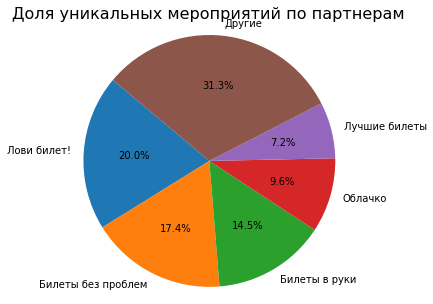

In [76]:
share_uevent_v=share_uevent.head()

sizes = share_uevent_v['share_unique_events']
labels = share_uevent_v.index.tolist()

total = sizes.sum()
if total < 1.0:  
    others_size = 1.0 - total
else:
    others_size = 0

if others_size > 0:
    sizes = sizes.append(pd.Series([others_size], index=['Другие']))
    labels.append('Другие')

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Доля уникальных мероприятий по партнерам', fontsize=16)
plt.axis('equal')
plt.show()


На визуализации видим лидеров из топ-5, а все  другие партнеры с незначительныи доялми (менее 9%) отнесены к сектору "другие". То есть по общему распределению данных можем сказать, что остальные партнеры менее привлекательны и в целом составляют меньше трети.

In [77]:
share_revenue=service_table.sort_values(by='share_revenue', ascending=False)
share_revenue.head()

,unique_events,count_orders,summary_revenue,share_unique_events,share_order_id,share_revenue
service_name,,,,,,
Билеты без проблем,4256,63254,24856576.0,0.174362,0.219637,0.166739
Мой билет,1302,34143,21062350.0,0.053341,0.118555,0.141287
Облачко,2335,26410,18609296.0,0.095661,0.091703,0.124832
Лови билет!,4872,40825,16730150.0,0.199599,0.141756,0.112227
Весь в билетах,856,16438,16566881.0,0.035069,0.057078,0.111131


В топ- 5 по выручке входят Билеты без проблем (с долей 0,17), Мой билет (0,14), Облачко (0,13), Лови билет! и Весь в билетах (0,11).

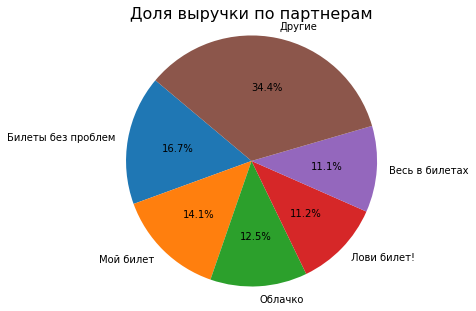

In [78]:
share_revenue_v=share_revenue.head()

sizes = share_revenue_v['share_revenue']
labels = share_revenue_v.index.tolist()

total = sizes.sum()
if total < 1.0: 
    others_size = 1.0 - total

else:
    others_size = 0

if others_size > 0:
    sizes = sizes.append(pd.Series([others_size], index=['Другие']))
    labels.append('Другие')

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Доля выручки по партнерам', fontsize=16)
plt.axis('equal')
plt.show()


По общему распределению данных можем увидеть аналогичную картину, что есть лидеры, приносящие около двух третей выручки, остальные партнеры менее привлекательны, поскольку у них незначительные в доли в выручке.

**Промежуточный вывод**  
Существуют явные лидеры среди регионов: в топ-3 как по доле заказов, так и по доле мероприятий входят Каменевский регион, Североярская область, Широковская область (последняя значительно уступает двум первым).  

Также можно выделить ключевых партнёров, которые вносят наибольший вклад в выручку: Билеты без проблем, Мой билет, Облачко.

## Статистический анализ данных

Перед проведением каждой из двух гипотез изучим сравниваемые данные, выберем статистический тест, сформулируем нулевую и альтернативную гипотезы. Данные берем только за осенний период.

### Гипотеза 1: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств. 

Для начала создадим таблицу с количеством заказов на уникального пользователя с указанием девайса. 

In [79]:
# Подсчет количества уникальных заказов для каждого пользователя
user_order_counts = df_autumn.groupby(['user_id', 'device_type_canonical']).agg(
    unique_orders=('order_id', 'nunique')).reset_index()
user_order_counts.head()

,user_id,device_type_canonical,unique_orders
0,0005ca5e93f2cf4,mobile,1
1,000898990054619,mobile,2
2,000a55a418c128c,mobile,2
3,001e7037d013f0f,mobile,2
4,00245c702bc343e,mobile,2


Теперь необходимо сравнить размеры групп и их статистики.

In [80]:
desk_user_order_counts = user_order_counts[user_order_counts['device_type_canonical'] == 'desktop']['unique_orders']

print("Количество пользователей ПК:", len(desk_user_order_counts))

print("\nСтатистики пользователей ПК:")
print(desk_user_order_counts.describe())


Количество пользователей ПК: 4874

Статистики пользователей ПК:
count    4874.000000
mean        7.049651
std        36.029971
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      1504.000000
Name: unique_orders, dtype: float64


In [81]:
mob_user_order_counts = user_order_counts[user_order_counts['device_type_canonical'] == 'mobile']['unique_orders']

print("Количество пользователей мобильных:", len(mob_user_order_counts))

print("\nСтатистики пользователей мобильных:")
print(mob_user_order_counts.describe())


Количество пользователей мобильных: 14200

Статистики пользователей мобильных:
count    14200.000000
mean         9.471127
std         68.117876
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       4340.000000
Name: unique_orders, dtype: float64


Количество пользователей мобильных значительно превышает количество пользователей ПК. Неравные группы могут не очень хорошо повлиять на анализ результатов. При этом, отметим, достаточно близкие статистики - медианы равны 2 и совпадают, 25 процентили совпадает, 75 процентили примерно равны (4 и 5). Максимум больше у мобильных пользователей.   

Среднее количество заказов для мобильных: 9.47, для ПК - 7.05.

Посмотрим на распределение числа заказов и на выбросы.

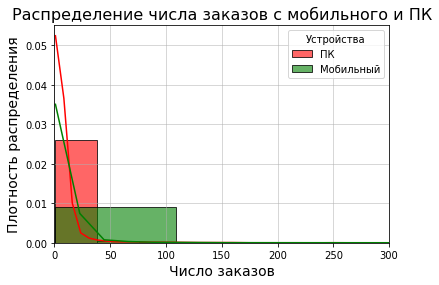

In [82]:
# Нормированная гистограмма для пользователей ПК
sns.histplot(desk_user_order_counts, 
             kde=True, 
             color='red', 
             label='ПК', 
             alpha=0.6, 
             bins=40, 
             stat='density', 
             common_norm=False)

# Нормированная гистограмма для мобильных пользователей
sns.histplot(mob_user_order_counts, 
             kde=True, 
             color='green', 
             label='Мобильный', 
             alpha=0.6, 
             bins=40, 
             stat='density', 
             common_norm=False)

# Настройки графика
plt.title('Распределение числа заказов с мобильного и ПК', fontsize=16)
plt.xlabel('Число заказов', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.legend(title='Устройства')
plt.grid(True, which='both', linewidth=0.5)
plt.xlim(0, 300)

# Отображение графика
plt.show()

Распределение не можем отнести к нормальному (по ПК гораздо меньшая площадь, число заказов в основной массе не доходит до 50, а у мобильнных пользователей превышает 100). Отдельно посмотрим на выбросы.

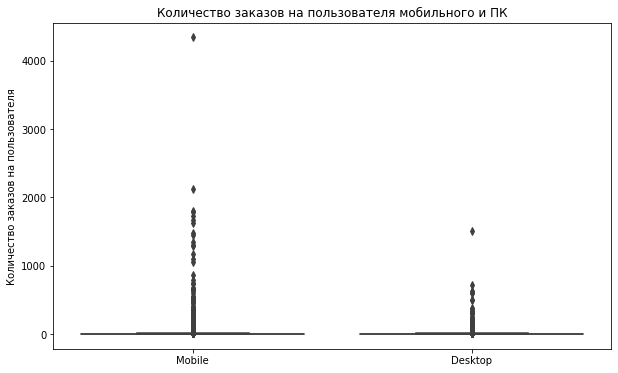

In [83]:
plt.figure(figsize=(10,6))
sns.boxplot(data=[mob_user_order_counts, desk_user_order_counts])
plt.xticks([0, 1], ['Mobile', 'Desktop'])
plt.ylabel('Количество заказов на пользователя')
plt.title('Количество заказов на пользователя мобильного и ПК')
plt.show()

При рассмотрении распределения количества заказов видим очень большие выбросы в обеих группах (и моб., и ПК).   

Поскольку данные не нормально распределены, t-тест не подходит.

Можем использовать статистический непараметрический тест Манна-Уитни, который подходит, покольку у нас выборки разного размера (количество пользователей в моб. и ПК значительно отличались), он не требует нормального распределения и устойчив к выбросам.  

Теперь сформулируем гипотезы.

- Нулевая гипотеза: Среднее количество заказов на одного пользователя мобильного приложения равно или меньше среднему количеству заказов на одного пользователя ПК.  
- Альтернативная гипотеза: Среднее количество заказов на одного пользователя мобильного приложения выше, чем среднее количество заказов на одного пользователя ПК.

In [84]:
# Проведение U-теста Манна-Уитни
u_stat, p_value = stats.mannwhitneyu(mob_user_order_counts, desk_user_order_counts, alternative='greater')

# Отображение результатов
print(f'p-value: {round(p_value, 2)}')

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Среднее количество заказов на 1 мобильного пользователя выше, чем у пользователей ПК.")
else:
    print("Нет достаточных оснований отвергнуть нулевую гипотезу.")

p-value: 0.0
Отвергаем нулевую гипотезу. Среднее количество заказов на 1 мобильного пользователя выше, чем у пользователей ПК.


Поскольку p-value ниже уровня значимости (стандартного 0.05), отвергаем нулевую гипотезу. Среднее количество заказов на одного пользователя мобильного приложения выше, чем среднее количество заказов на одного пользователя ПК.

### Гипотеза 2: Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Создаем таблицу с типом устройств и временем между заказами.

In [85]:
times = df_autumn[['user_id', 'device_type_canonical', 'days_since_prev']].reset_index()
times.head()

,index,user_id,device_type_canonical,days_since_prev
0,2,0005ca5e93f2cf4,mobile,75
1,4,000898990054619,mobile,83
2,5,000898990054619,mobile,19
3,7,000a55a418c128c,mobile,0
4,8,000a55a418c128c,mobile,16


Оценим размеры выборок.

In [86]:
# Фильтруем данные по типу устройства
mobile_days = times[times['device_type_canonical'] == 'mobile']['days_since_prev']
desktop_days = times[times['device_type_canonical'] == 'desktop']['days_since_prev']

print("Количество пользователей мобильных:", len(mobile_days))
print("Количество пользователей ПК:", len(desktop_days))


Количество пользователей мобильных: 134490
Количество пользователей ПК: 34360


Группы явно не равны. Посмотрим на средние значения времени между заказами по группам.

In [87]:
mean_mobile_days=mobile_days.mean()
mean_desktop_days=desktop_days.mean()

print(f"Среднее количество дней между заказами по mobile: {mean_mobile_days:.2f}")
print(f"Среднее количество дней между заказами по desktop: {mean_desktop_days:.2f}")

Среднее количество дней между заказами по mobile: 3.58
Среднее количество дней между заказами по desktop: 2.90


Для проверки нормальности распределения в этот раз проведем тест Шапиро-Уилка на нормальность распределения для количества дней между заказами (нулевая гипотеза утверждает, что данные нормально распределены). Сформиулируем для теста Шапиро-Уилка гипотезы для разных групп.

**Для мобильных пользователей**:

Нулевая гипотеза (H0): Распределение числа заказов мобильных пользователей нормально.  
Альтернативная гипотеза (H1): Распределение числа заказов мобильных пользователей не нормально.  

**Для пользователей ПК**:   

Нулевая гипотеза (H0):  Распределение числа заказов пользователей ПК нормально.  
Альтернативная гипотеза (H1): Распределение числа заказов пользователей ПК не нормально.  


In [88]:
# Проведение теста Шапиро-Уилка
shapiro_mobile = stats.shapiro(mobile_days)
shapiro_desktop = stats.shapiro(desktop_days)

# Отображение результатов
print(f"Тест Шапиро для мобильных: statistic = {shapiro_mobile.statistic}, p-value = {shapiro_mobile.pvalue}")
print(f"Тест Шапиро для ПК: statistic = {shapiro_desktop.statistic}, p-value = {shapiro_desktop.pvalue}")

# Интерпретация результатов
alpha = 0.05  # Уровень значимости

# Для мобильных пользователей
if shapiro_mobile.pvalue > alpha:
    print("Для мобильных: Не отвергаем H0, данные имеют нормальное распределение.")
else:
    print("Для мобильных: Отвергаем H0, данные не имеют нормального распределения.")

# Для пользователей ПК
if shapiro_desktop.pvalue > alpha:
    print("Для ПК: Не отвергаем H0, данные имеют нормальное распределение.")
else:
    print("Для ПК: Отвергаем H0, данные не имеют нормального распределения.")


Тест Шапиро для мобильных: statistic = 0.2988370656967163, p-value = 0.0
Тест Шапиро для ПК: statistic = 0.26009076833724976, p-value = 0.0
Для мобильных: Отвергаем H0, данные не имеют нормального распределения.
Для ПК: Отвергаем H0, данные не имеют нормального распределения.


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Полученные результаты указывают на то, что распределение данных, как для мобильных пользователей, так и для пользователей ПК не соответствует нормальному распределению. Статистика теста (statistic) 0,299 для моб. и 0,260 для ПК показывают, насколько сильно отклоняются данные от нормального распределения.

При этом, полученное p-value сравниваем с выбранным уровнем значимости (стандартно α = 0.05). Соответственно, если p-value меньше 0.05, мы отвергаем нулевую гипотезу (которая утверждает, что данные нормально распределены).  
В нашем случае по обеим группам p-value меньше α, то есть нет нормального распределения данных. Проверим на выбросы.

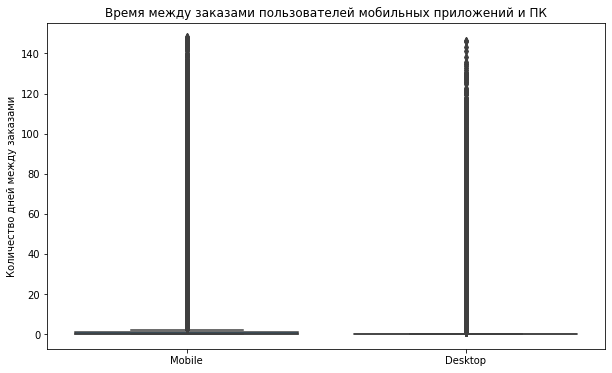

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(data=[mobile_days, desktop_days])
plt.xticks([0, 1], ['Mobile', 'Desktop'])
plt.ylabel('Количество дней между заказами')
plt.title('Время между заказами пользователей мобильных приложений и ПК')
plt.show()

Ненормальность распределения компенсируется ЦПТ, а неравенство выборок - поправкой Уэлча. Аргментом в пользу теста МУ могут быть выбросы.
Выбросы просто зашкаливают. В связи с их наличием, а также отсутствием нормального распределения и неравными выборками снова прибегнем к тесту Манна-Уитни. 

Сформулируем гипотезы:  
- Нулевая гипотеза: Среднее время между заказами пользователей мобильных приложений равно или меньше среднему времени между заказами пользователей ПК.  
- Альтернативная гипотеза: Среднее время между заказами пользователей мобильных приложений больше, чем среднее время между заказами пользователей ПК.

In [90]:
# Проведение U-теста Манна-Уитни
u_stat, p_value = stats.mannwhitneyu(mobile_days, desktop_days, alternative='greater')

# Отображение результатов
print(f'p-value: {round(p_value, 2)}')

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Среднее время между заказами мобильного пользователя выше, чем у пользователей ПК.")
else:
    print("Нет достаточных оснований отвергнуть нулевую гипотезу.")


p-value: 0.0
Отвергаем нулевую гипотезу. Среднее время между заказами мобильного пользователя выше, чем у пользователей ПК.


Поскольку p-value ниже уровня значимости (стандартного 0.05), отвергаем нулевую гипотезу. Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

**Промежуточный вывод**  
По результатам изучения данных за осенний период для тестов, в связи с отсутствием нормального распределния и наличием выбросов, а также разных размеров выборок, были проведены 2 теста Манна-Уитни. Обе гипотезы нашли подтверждение: 
- Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств. 
- Среднее время между заказами мобильного пользователя выше, чем у пользователей ПК.

##  Общий вывод и рекомендации по проведённому анализу

•	Работали с данными с 3 датасетов с информацией о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года. 
Анализировалась выручка по заказам в 2 валютах – рублях и тенге. Тенге были приведены к рублевому эквиваленту (рассчитан по курсе на дату заказа). В связи с выбросами в обеих валютах, (в рублевой валюте значительные) обобраны значения по 99-му процентилю. Были выявлены неявные дубликаты, в связи с них небольшим количеством (30), они были удалены. Проводено преобразование типов данных  и снижение разрядности, а также сформированы новые столбцы  revenue_rub - выручка в рублях для всех покупок, one_ticket_revenue_rub — выручка с продажи одного билета на мероприятие, month — месяц оформления заказа и season - сезон. Для расчета ряда характеристик брали в расчет только осенние показатели.   
•	Чаще всего покупают по 3 билета в любой из валют. Заказов значительно больше в рублях, как и суммарное значение выручки. По распределению выручки медиана в тенге больше, чем в рублях.  
•	Отметим увеличение заказов от июня к ноябрю 2024 года по всем категориям, в основном заказы делают с мобильного. Наиболее востребованы концерты, театры и другое в оба исследуемых сезона. По возрастному рейтингу летом и осенью лидируют 16+ и 12+, интересно, что 0+ вышло на 2 место осенью.   
•	Средняя выручка с продажи одного билета на елки на 2 месте после концертов, осенью цены на билеты по всем популярным мероприятиям снижаются, количество заказов увеличивается – как результат падает средний чек.  
•	Наблюдается восходящий тренд пользовательской активности от сентября к ноябрю  по  общему числу заказов, количеству активных пользователей DAU, среднему числу заказов на одного пользователя. DAU в основном растет в будни и падает в выходные.   
•	Топ-3 лидеров среди регионов: Каменевский регион, Североярская область, Широковская область. Также можно выделить ключевых партнёров: Билеты без проблем, Мой билет, Облачко.  
•	Мобильное приложение – лучший вариант заказа, статистически подтверждено:  
- среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.   
- среднее время между заказами мобильного пользователя выше, чем у пользователей стационарных устройств.    


Возможно рекомендовать продолжать активное сотрудничество партнерами Билеты без проблем, Мой билет, Облачко, развивать деятельность регионах-лидерах по выручке (Каменевский регион, Североярская область в первую очередь),  обратить внимание на разработку мобильных приложений для еще большего удобства заказов в них, стоит также обратить внимание на падение активности пользователей в выходные, вероятно, стоит предложить пользователям дополнительные скидки или акции при заказе в выходные дни. Заметим, что при резком снижении стоимости билетов были пики продаж и рост выручки как результат: такую тактику распродаж, либо скидок для покупки большого количества билетов также стоит рассмотреть как вариант увеличения выручки. Такие акции стоит проводить в осеннее время, так как сезонность явно имеет значение.
